In [1]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv("C:/Users/hp/Documents/Class/ML/Datasets/advertising.csv")

In [4]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [5]:
X = data[['TV', 'Radio', 'Newspaper']]  
y = data['Sales']  
x1 = data['TV']
x2 = data['Radio']
x3 = data['Newspaper']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# beta 1
model.coef_

array([ 0.05402869,  0.11035537, -0.00214489])

In [11]:
# beta 0
model.intercept_

4.681159648244929

Multiple Linear Regression Model

In [12]:
y = 4.7141264022141325 + 0.05450927 * x1 + 0.10094536 * x2 + 0.00433665 * x3

In [13]:
y = 4.7141264022141325 + 0.05450927 * 230.1 + 0.10094536 * 37.8 + 0.00433665 * 69.2
y

21.372540217214134

In [14]:
y_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 1.1687283175496017
Mean Squared Error: 2.969830647109429
R-squared: 0.8917837246518734


In [16]:
new_data = np.array([[230.1, 37.8, 69.2]])
new_prediction = model.predict(new_data)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [17]:
new_prediction

array([21.13616657])

In [18]:
df = pd.DataFrame({'Actual':y_test, 'predicted':y_pred})
df

,Actual,predicted
197,14.8,15.256815
89,16.7,15.778248
27,20.9,19.447264
190,10.8,11.338458
102,19.8,20.888686
184,17.6,20.679863
123,15.2,15.123790
81,17.3,18.010549
109,19.8,21.436849
57,13.2,14.123085


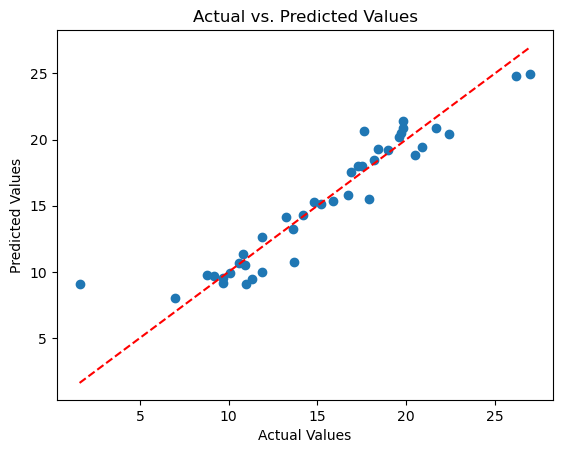

In [19]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# You can also add a reference line for a perfect match (y = x)
min_val = min(np.min(y_test), np.min(y_pred))
max_val = max(np.max(y_test), np.max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.show()


In [20]:
from scipy import stats
r = stats.linregress(y_test, y_pred)
print("R-squared value", r)

R-squared value LinregressResult(slope=0.8703440117988644, intercept=1.9691095135918015, rvalue=0.9446343938744944, pvalue=5.522163065593231e-20, stderr=0.04904270362558398, intercept_stderr=0.7933504333007024)


In [21]:
import pickle

In [22]:
with open('linear.pkl', 'wb') as file:
    pickle.dump(model, file)